

# Project: No Show Appointments Data Analysis


## Introduction
The No Show Appointments file has records of 110,527 patients in Brazil. It contains information such as the Patient's ID, Appointment ID, Gender,Appointment Day, Age, Neighbourhood, Scholarship, medical condition e.g (Hypertension,Diabetes,Alcoholism, Handcap), Whether they received an SMS and whether they showed up for their appointment.

We could try to answer different questions using this dataset. Below are some of the questions:
1.) Which medical conditions are most common with the patients?
2.) The average age of the patients?
3.) The neighbourhood where most of the patients come from and relate to the most common conditions in that area?
4.) How many of the patients receive SMS?
5.) How many of the patients honor their appointments?

I will be answering 3 questions. The questions are as below:

1.) Does receiving an SMS influence whether the patient will show up for their appointment?
2.) Are patients in the welfare program more likely to show up for their appointments?
3.) Is there a relationship between gender and patients showing up for their appointments?

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline










In [83]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")


In [84]:
df.shape

(110527, 14)

In [85]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [87]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [88]:
#Checking for duplicates
sum(df.duplicated())

0

In [89]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## DATA CLEANING

In [90]:
#Dropping columns that I will not use in the analysis
df.drop(['PatientId', 'AppointmentID'],axis=1, inplace=True)
df.head()



,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [91]:
# Converting the No-show columns from text to binary. 1 is for No and 0 yes (1 they did show up for the appointment and 0 they did not show up for the appointment)
dummy = pd.get_dummies(df['No-show'])

In [92]:
dummy.tail()

,No,Yes
110522,1,0
110523,1,0
110524,1,0
110525,1,0
110526,1,0


In [93]:
# Concatinating the two data sets together(df and dummy)
df2 = pd.concat((df,dummy), axis=1)

In [94]:
df2.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No,Yes
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,0
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,0
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,0
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,1,0
110526,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,1,0


In [95]:
# Dropping the No-show and Yes columns
df2 =df2.drop(['No-show','Yes'],axis=1)

In [96]:
#Renaming the 'No' column to 'Showed_up'-Will show how many people showed up to their appointmnents'
df2 = df2.rename(columns={"No":"Showed_up"})

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Showed_up         110527 non-null uint8
dtypes: int64(7), object(4), uint8(1)
memory usage: 9.4+ MB


In [98]:
#There is a negative value on the age column
#Deleting the entire row
index_def=df2[df2['Age']<0].index
df2 = df2.drop(index_def)
df2.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [99]:
#Exploring the correlation matrix of the data
df2.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
Showed_up,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


## Visual Exploration of Data

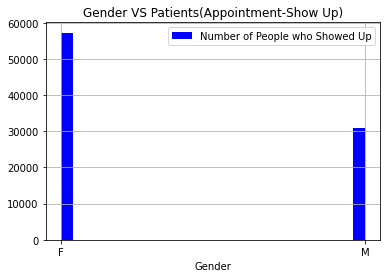

In [100]:
#Checking gender vs people who showed up showed up for their appointments
plt.hist(df2.Gender[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Number of People who Showed Up');
plt.legend()
plt.xlabel('Gender')
plt.title('Gender VS Patients(Appointment-Show Up)')
plt.grid(True)

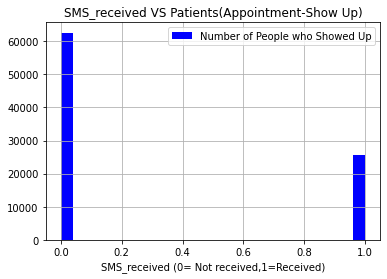

In [101]:
#Checking SMS Received vs people who showed up showed up for their appointments
plt.hist(df2.SMS_received[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Number of People who Showed Up');
plt.legend()
plt.xlabel('SMS_received (0= Not received,1=Received)')
plt.title('SMS_received VS Patients(Appointment-Show Up)')
plt.grid(True)

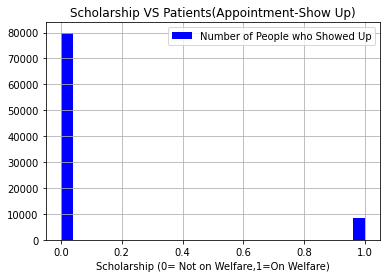

In [102]:
#Checking People on Welfare vs people who showed up showed up for their appointments
plt.hist(df2.Scholarship[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Number of People who Showed Up');
plt.legend()
plt.xlabel('Scholarship (0= Not on Welfare,1=On Welfare)')
plt.title('Scholarship VS Patients(Appointment-Show Up)')
plt.grid(True)

<AxesSubplot:>

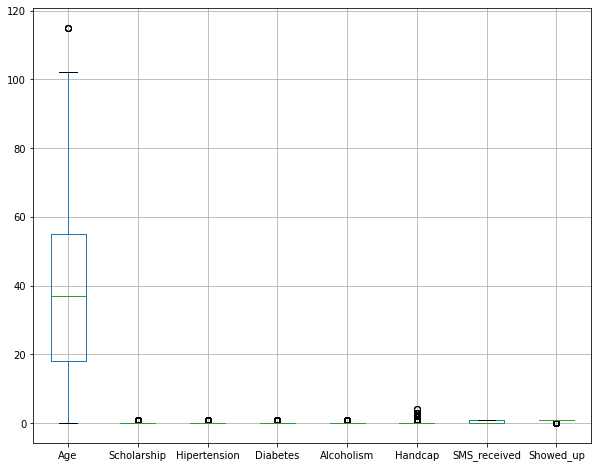

In [103]:
#Checking for outliers in the data set
#Age seem to be the only variable with outliers
df2.boxplot(figsize=(10,8))

### Research Question 1  (Does receiving SMS affect whether a patient will show up for their appointment?)

In [104]:
#Checking the mean of the data to see what percentage of the population received SMS and what percentage showed up for their appointment
df2.mean()

Age             37.089219
Scholarship      0.098266
Hipertension     0.197248
Diabetes         0.071865
Alcoholism       0.030400
Handcap          0.022248
SMS_received     0.321029
Showed_up        0.798066
dtype: float64

In [105]:
#The summary below shows 79.8% of the population showed up for their appointment and 32.1% received SMS

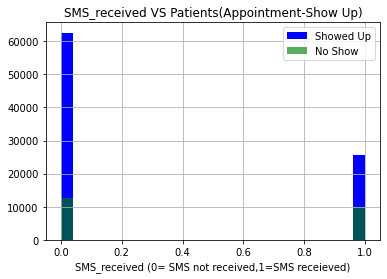

In [106]:
#Checking if there is a relationship between people who received sms and those who showed up for their appointments
plt.hist(df2.SMS_received[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Showed Up');
plt.hist(df2.SMS_received[df2.Showed_up ==0], 25, facecolor='g', alpha=0.65,label='No Show');
plt.legend()
plt.xlabel('SMS_received (0= SMS not received,1=SMS receieved)')
plt.title('SMS_received VS Patients(Appointment-Show Up)')
plt.grid(True)

In [107]:
#function for calculating percentage
def calc_percentage(n1,n2):
    results = n1/n2
    return results

#defining variables for how many patients showed up and received SMS,
#how many patients showed up and did not receive SMS

showed_and_received_sms = df2[(df2.SMS_received == 1) & (df2.Showed_up == 1)].count()['Age']
showed_no_sms = df2[(df2.SMS_received == 0) & (df2.Showed_up == 1)].count()['Age']
showed_up = df2[df2.Showed_up == 1].count()['Age']

#Calculating the percentage of the patients who showed up and received SMS
#Calculating the percentage of the patients who showed up and did not get SMS

per_received_sms_showed = calc_percentage(showed_and_received_sms,showed_up)
per_received_no_sms_showed = calc_percentage(showed_no_sms,showed_up)

print(per_received_sms_showed)
print(per_received_no_sms_showed)


0.29133742220005215
0.7086625777999479


In [108]:
#29% received the SMS and showed up for their appointments
#71% did not receive the SMS and showed up for their appointments

### Research Question 2  (Is there a relationship between a patient being in the welfare program and them showing up for their appointment?)

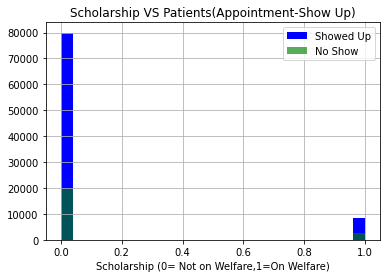

In [109]:
#Checking if there is a relationship between people who are on welfare and those who showed up for their appointments
plt.hist(df2.Scholarship[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Showed Up');
plt.hist(df2.Scholarship[df2.Showed_up ==0], 25, facecolor='g', alpha=0.65,label='No Show');
plt.legend()
plt.xlabel('Scholarship (0= Not on Welfare,1=On Welfare)')
plt.title('Scholarship VS Patients(Appointment-Show Up)')
plt.grid(True)

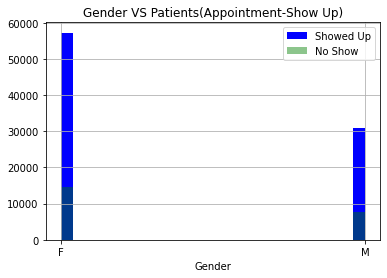

In [110]:
plt.hist(df2.Gender[df2.Showed_up ==1], 25, facecolor='b', alpha=1,label='Showed Up');
plt.hist(df2.Gender[df2.Showed_up ==0], 25, facecolor='g', alpha=0.45,label='No Show');
plt.legend()
plt.xlabel('Gender')
plt.title('Gender VS Patients(Appointment-Show Up)')
plt.grid(True)

In [111]:
#defining variables for how many patients showed up and were on welfare,
#how many patients showed up and were not on welfare

showed_and_scholarship = df2[(df2.Scholarship == 1) & (df2.Showed_up == 1)].count()['Age']
showed_no_scholarship = df2[(df2.Scholarship == 0) & (df2.Showed_up == 1)].count()['Age']

#Calculating the percentage of the patients who showed up and are on welfare
#Calculating the percentage of the patients who showed up and are not on welfare

per_welfare_showed = calc_percentage(showed_and_scholarship,showed_up)
per_no_welfare_showed = calc_percentage(showed_no_scholarship,showed_up)

print(per_welfare_showed)
print(per_no_welfare_showed)


0.09390411191855522
0.9060958880814448


In [112]:
#Out of the 79.8% that showed up for their appointments 72.3% did not have welfare and 7.5% did have welfare.

### Research Question 3  (Is there a relationship between gender and showing up for appointment?)

In [113]:
#defining variables for how many patients showed up and were on female,
#how many patients showed up and were male.
#Number of males and females

showed_female = df2[(df2.Gender == "F") & (df2.Showed_up == 1)].count()['Age']
showed_male = df2[(df2.Gender == "M") & (df2.Showed_up == 1)].count()['Age']
count_female = df2[df2.Gender == "F"].count()['Age']
count_male = df2[df2.Gender == "M"].count()['Age']

#Calculating the percentage of the patients who showed up and were females
#Calculating the percentage of the patients who showed up and were males
#Calculating the percentage of female patients who showed up
#Calculating the percentage of male patients who showed up
 

per_females = calc_percentage(showed_female,showed_up)
per_males = calc_percentage(showed_male,showed_up)
per_females_f = calc_percentage(showed_female,count_female)
per_males_m = calc_percentage(showed_male,count_male)

print(per_females)
print(per_males)
print(per_females_f)
print(per_males_m)

0.6489847744510073
0.3510152255489927
0.7968512924734475
0.8003205211052808


Conclusion 
79.8% of the patients showed up for their appointments and 32.1% had received SMS's.29% of the patients received the SMS and showed up for their appointments and 71% of them did not receive the SMS and still showed up for their appointments. Hence, it seems like receiving the SMS did not have influence on whether an individual would honor their appointment.

Only 9.8% of the patients were on welfare. 9% of the patients were in welfare and showed up for their appointments and 91% of the patients who were not in the welfare and honored their appointments.

65% of the patients were female and 35% were male. Approximately 80% of the female patients and 80% of the males patients showed up for their appointments. There was equal turn up of between males and females in showing up for their appointments.

However, my exploration had limitations since I did not look into the relationship of individuals honoring their appointments against the 'serious' or 'level' of their illness. I would assume individuals in more critical condition are more likely to honor their appointments.



In [114]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0